<a href="https://colab.research.google.com/github/MahisaAghisni/PCVK_GENAP_2023/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png) 

[[0 1 0]
 [1 1 1]
 [0 1 0]]


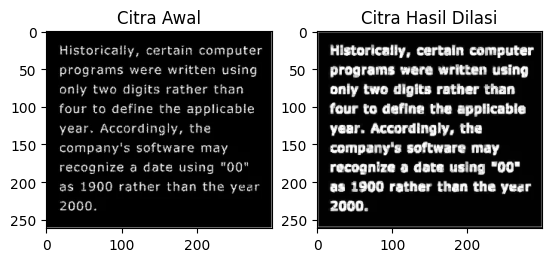

In [27]:
# Membaca gambar input
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/morphology.png',0)

# Membuat Structuring Element (SED) berbentuk cross 3 x 3
kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

# Membuat gambar kosong untuk menampung hasil dilasi
cross3 = np.zeros_like(img)

# Mendapatkan ukuran gambar input
height, width = img.shape

# Looping untuk melakukan operasi dilasi
for i in range(1, height-1):
    for j in range(1, width-1):
        # Melakukan dilasi pada setiap piksel pada gambar input
        dilated_pixel = np.max(img[i-1:i+2, j-1:j+2] + kernel)
        cross3[i, j] = dilated_pixel
print(kernel)
# Menampilkan gambar hasil dilasi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(cross3, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png, dan cetak Structuring Element-nya)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


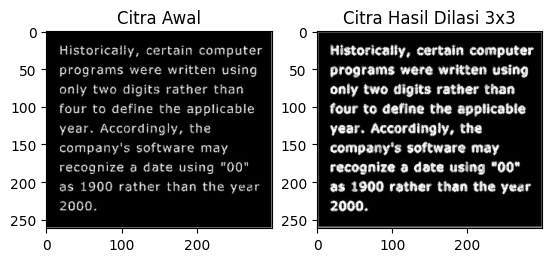

In [29]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/morphology.png')

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
cross3 = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel)

print(kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(cross3), plt.title('Citra Hasil Dilasi 3x3')
plt.show()

Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar.png)

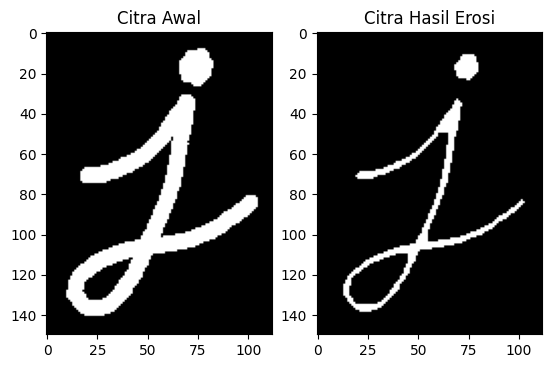

In [33]:
# Membaca gambar input
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/j.png')

# Membuat Structuring Element (SED) berbentuk cross 3 x 3
img_gray = np.mean(img, axis=2)

# Membuat kernel berukuran 5 x 5 dengan nilai 1
kernel = np.ones((5, 5), dtype=np.uint8)

# Membuat gambar kosong untuk menampung hasil erosi
erosion_img = np.zeros_like(img_gray)

# Mendapatkan ukuran gambar input
height, width = img_gray.shape

# Looping untuk melakukan operasi erosi
for i in range(2, height-2):
    for j in range(2, width-2):
        # Melakukan erosi pada setiap piksel pada gambar input
        eroded_pixel = np.min(img_gray[i-2:i+3, j-2:j+3] * kernel)
        erosion_img[i, j] = eroded_pixel
# Menampilkan gambar hasil erosi
plt.subplot(121), plt.imshow(img_gray, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion_img, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)


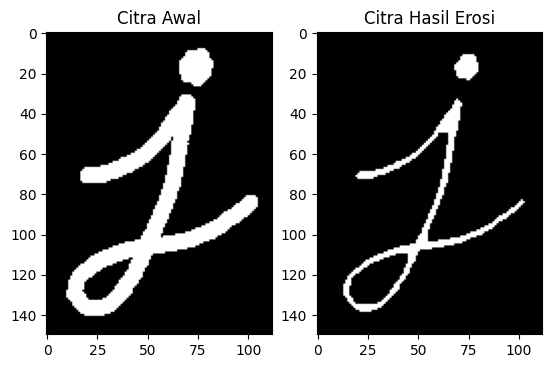

In [34]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/j.png')

kernel = np.ones((5,5), np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')
plt.show()

Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)


<ipython-input-53-52a5c084577d>:47: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')


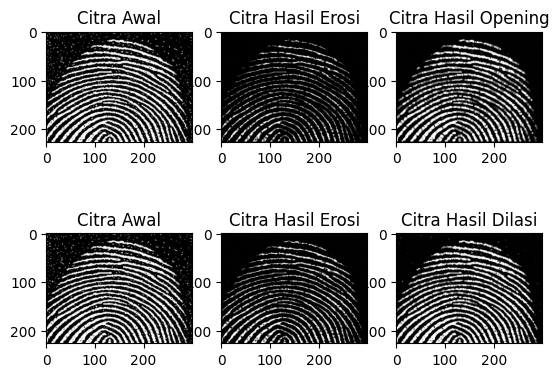

In [53]:
img7 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/fingerprint.png', 0)

#Mendapatkan ukuran dari gambar
m, n = img7.shape

#Menampilkan gambar
plt.imshow(img7, cmap="gray")

# Mendefinisikan structure element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Mendefinisikan image baru dengan variable imgErode
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosi tanpa menggunakan library dari morphologhy
for i in range(constant, m-constant): #constant merupakan tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img7[i-constant:i+constant+1, j-constant:j+constant+1] #temp berfungsi untuk menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#membaca image untuk delasi
img7_2 = imgErode

#mengambil ukuran dari gambar
p, q= img7_2.shape

#Menampilkan gamber
plt.imshow(img7_2, cmap="gray")

#Menetapkan gambar baru untuk menyimpan piksel gambar yang diperbesar
imgDilate = np.zeros((p,q), dtype=np.uint8)

#mendefinisikan structuring element 
SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

#operasi dilasitanpa menggunakan library cv2
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img7_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(231),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')
plt.subplot(232),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(233),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Opening')# Membaca image untuk operasi erosi


# Membaca gambar input
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/fingerprint.png', 0)

# Mendefinisikan Structuring Element (SED) berbentuk cross 3 x 3
kernel = cv2.getStructuringElement(cv2.MORPH_OPEN,(3,3))

# Melakukan erosi pada gambar input dengan SED yang telah didefinisikan
eroded_img = cv2.erode(img,kernel,iterations = 1)

# Melakukan dilasi pada hasil erosi dengan SED yang sama
dilated_img = cv2.dilate(eroded_img,kernel,iterations = 1)

# Menampilkan gambar hasil

plt.subplot(234),plt.imshow(img,cmap = 'gray'),plt.title('Citra Awal')
plt.subplot(235),plt.imshow(eroded_img,cmap = 'gray'),plt.title('Citra Hasil Erosi')
plt.subplot(236),plt.imshow(dilated_img,cmap = 'gray'),plt.title('Citra Hasil Dilasi')

plt.show()

Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png) 


<ipython-input-59-eb05f609374d>:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')


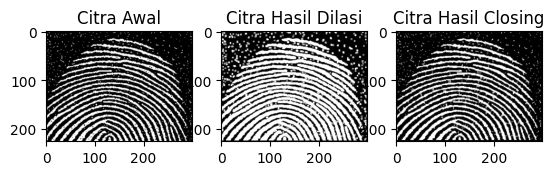

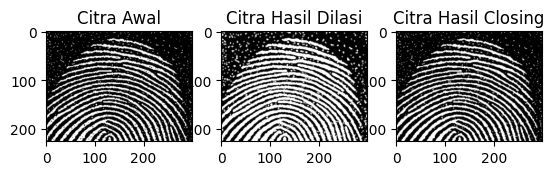

In [59]:
# Melakukan Load gambar yang akan dipakai yaitu fingerprint.png
img7 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/fingerprint.png', 0)

#Mendapatkan ukuran dari gambar
m, n = img7.shape

#Menampilkan gambar
plt.imshow(img7, cmap="gray")

#Menetapkan gambar baru untuk menyimpan piksel gambar yang diperbesar
imgDilate = np.zeros((m,n), dtype=np.uint8)

#mendefinisikan structuring element 
SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

#operasi dilasitanpa menggunakan library cv2
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img7[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

#------------------------------------------------------------------------------------------------------------------------------- 

#membaca image untuk delasi
img7_2 = imgDilate

#mengambil ukuran dari gambar
p, q= img7_2.shape

#Menampilkan gamber
plt.imshow(img7_2, cmap="gray")


# Mendefinisikan structure element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Mendefinisikan image baru dengan variable imgErode
imgErode = np.zeros((p,q), dtype=np.uint8)

#Erosi tanpa menggunakan library dari morphologhy
for i in range(constant, m-constant): #constant merupakan tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img7_2[i-constant:i+constant+1, j-constant:j+constant+1] #temp berfungsi untuk menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

plt.subplot(231),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')
plt.subplot(232),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.subplot(233),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Closing')
plt.show()


# Membaca gambar input
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/fingerprint.png',0)

# Mendefinisikan Structuring Element (SED) berbentuk cross 3 x 3
kernel = cv2.getStructuringElement(cv2.MORPH_OPEN,(3,3))

# Melakukan dilasi pada hasil erosi dengan SED yang sama
dilated_img = cv2.dilate(img,kernel,iterations = 1)

# Melakukan erosi pada gambar input dengan SED yang telah didefinisikan
eroded_img = cv2.erode(dilated_img,kernel,iterations = 1)


# Menampilkan gambar hasil

plt.subplot(234),plt.imshow(img,cmap = 'gray'),plt.title('Citra Awal')
plt.subplot(235),plt.imshow(dilated_img,cmap = 'gray'),plt.title('Citra Hasil Dilasi')
plt.subplot(236),plt.imshow(eroded_img,cmap = 'gray'),plt.title('Citra Hasil Closing')

plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 


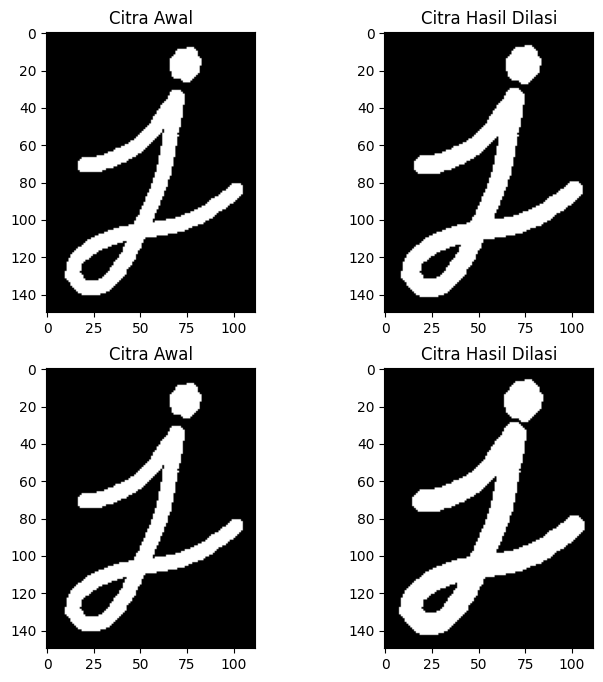

In [69]:
# Load image
img9 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/j.png')

# Define structuring element circular 3x3 and 5x5
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

# Dilate image with circular 3x3 kernel
dilation3 = cv2.dilate(img9, kernel3, iterations=1)

# Dilate image with circular 5x5 kernel
dilation5 = cv2.dilate(img9, kernel5, iterations=1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img9, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 1].imshow(dilation3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi')
axs[1, 0].imshow(img9, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 1].imshow(dilation5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi')
plt.show()

Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

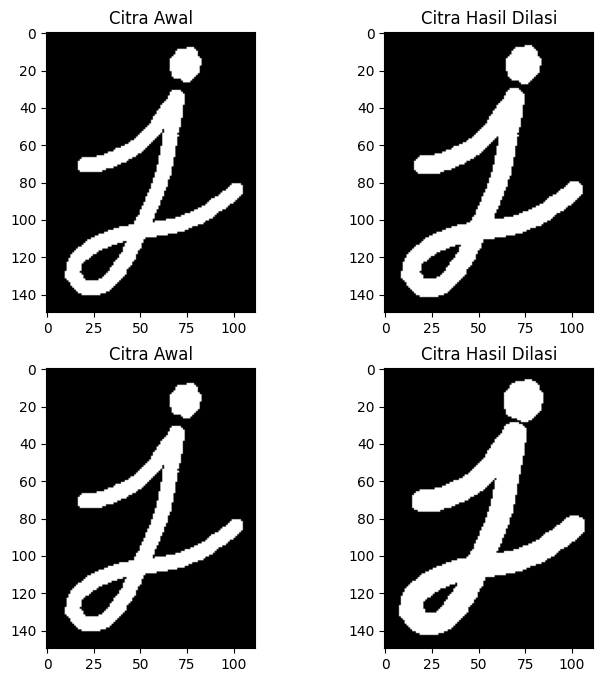

In [71]:
# Load image
img10 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/j.png')

# Define structuring element circular 3x3 and 5x5
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

# Dilate image with circular 3x3 kernel
dilation3 = cv2.dilate(img10, kernel3, iterations=1)

# Dilate image with circular 5x5 kernel
dilation5 = cv2.dilate(img10, kernel5, iterations=1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img10, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 1].imshow(dilation3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi')
axs[1, 0].imshow(img10, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 1].imshow(dilation5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi')
plt.show()

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 


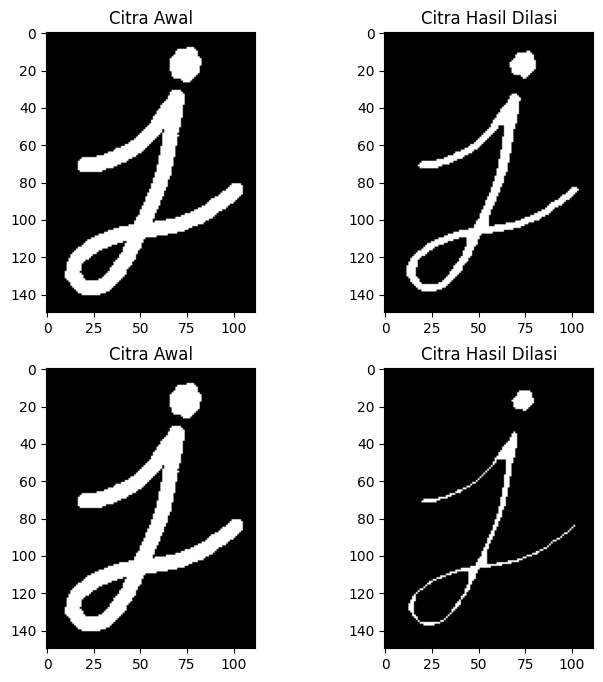

In [73]:
# Load image
img11 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/j.png')

# Define structuring element circular 3x3 and 5x5
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,5))
kernel5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,7))

# Dilate image with circular 3x3 kernel
dilation3 = cv2.erode(img11, kernel3, iterations=1)

# Dilate image with circular 5x5 kernel
dilation5 = cv2.erode(img11, kernel5, iterations=1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img11, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 1].imshow(dilation3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi')
axs[1, 0].imshow(img11, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 1].imshow(dilation5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi')
plt.show()

Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

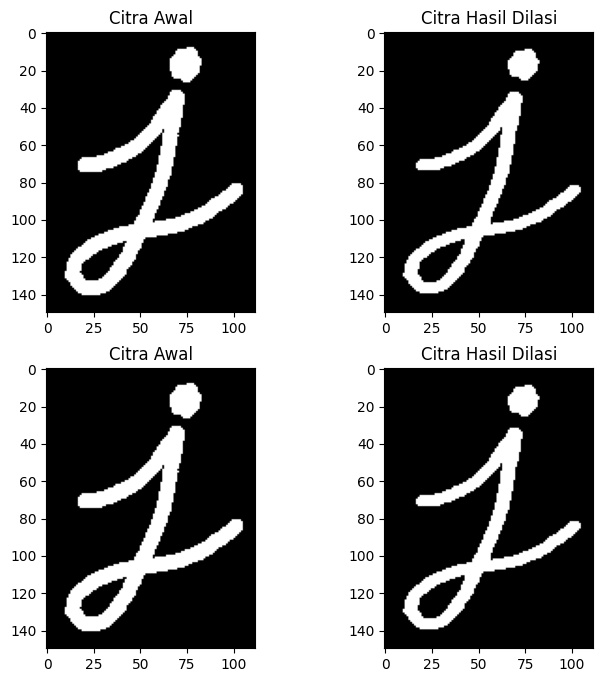

In [81]:
img12 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/j.png')
kernel = np.ones((3,1),np.uint8) 
erosion = cv2.morphologyEx(img12, cv2.MORPH_ERODE, kernel)
kernel_2 = np.ones((5,1),np.uint8) 
erosion_2 = cv2.morphologyEx(img12, cv2.MORPH_ERODE, kernel_2)


fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img12, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 1].imshow(erosion, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi')
axs[1, 0].imshow(img12, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 1].imshow(erosion, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi')
plt.show()